In [1]:
from environments import OneDCleanupEnv
import numpy as np
from tqdm import tqdm
import matplotlib.pyplot as plt

2023-12-02 23:44:35,045	WARNING deprecation.py:50 -- DeprecationWarning: `DirectStepOptimizer` has been deprecated. This will raise an error in the future!


In [2]:
num_episodes = 1
verbose_episode = num_episodes - 1
steps_per_episode = 1000
num_agents = 10
agent_ids = [str(i) for i in range(num_agents)]

In [3]:
thresholdDepletion = 0.4
thresholdRestoration = 0.0
wasteSpawnProbability = 0.5
appleRespawnProbability = 0.05
dirt_multiplier = 10

area = 150

In [4]:
env = OneDCleanupEnv(agent_ids=agent_ids,
                     num_agents=num_agents,
                     area=area,
                     thresholdDepletion=thresholdDepletion,
                     thresholdRestoration=thresholdRestoration,
                     wasteSpawnProbability=wasteSpawnProbability,
                     appleRespawnProbability=appleRespawnProbability,
                     dirt_multiplier=dirt_multiplier)

In [5]:
test_stats = []
for episode in range(num_episodes):
    test_stats.append({
        "num_apples": [],
        "num_dirt": [],
        "pickers": [],
        "cleaners": [],
        "total_reward": 0,
    })
    
    print(f"========= Episode {episode} =========")

    states, info = env.reset()
    state = states["coordinator"]
    test_stats[-1]["num_apples"].append(info["apple"])
    test_stats[-1]["num_dirt"].append(info["dirt"])
    test_stats[-1]["pickers"].append(info["picker"])
    test_stats[-1]["cleaners"].append(info["cleaner"])

    print(f"info: {info}")

    for step in tqdm(range(steps_per_episode)):
        #env.render()
        num_apples, num_dirt, _, _ = state
        print('state', state)
        print('agents', [(id, agent.region, agent.pos) for id, agent in env._agents.items()])
        agent_frequency_in_dirt = num_dirt / (num_apples + num_dirt)
        num_cleaner = round(num_agents * agent_frequency_in_dirt)
        num_picker = num_agents - num_cleaner
        print('counts', num_cleaner, num_picker)
        assignments = env.get_greedy_assignments(num_picker, num_cleaner)
        print('assignments', assignments)
        actions = env.get_greedy_actions(assignments)
        print('actions', actions)
        next_states, reward, dones, _, info = env.step(actions)
        print('reward', sum(reward.values()))
        next_state = next_states["coordinator"]
        test_stats[-1]["num_apples"].append(info["apple"])
        test_stats[-1]["num_dirt"].append(info["dirt"])
        test_stats[-1]["pickers"].append(info["picker"])
        test_stats[-1]["cleaners"].append(info["cleaner"])
        #reward = sum(rewards.values())

        state = next_state

        if episode > verbose_episode:
            print(f"========= Step {step} =========")
            print(f"info: {info}")

        if dones["__all__"]:
            break 

    ending_reward = info["total_apple_consumed"]

    test_stats[-1]["total_reward"] = ending_reward

    print(f"ending reward: {ending_reward}")
    #print(f"reward graph: {reward_graph}")
    print(f"========= End of Episode {episode} =========")



========= Episode 0 =========
info: {'total_apple_consumed': 0, 'step_apple_consumed': 0, 'apple': 0, 'dirt': 78, 'picker': 0, 'cleaner': 10, 'apple_map': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'waste_map': array([0., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0.,
       0., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.,
       1., 1., 1.

100%|██████████| 100/100 [00:00<00:00, 1836.51it/s]

state (0, 78, 0, 10)
agents [('7', <CleanupRegion.WASTE: -1>, array(0)), ('4', <CleanupRegion.WASTE: -1>, array(15)), ('6', <CleanupRegion.WASTE: -1>, array(30)), ('8', <CleanupRegion.WASTE: -1>, array(45)), ('3', <CleanupRegion.WASTE: -1>, array(60)), ('5', <CleanupRegion.WASTE: -1>, array(75)), ('1', <CleanupRegion.WASTE: -1>, array(90)), ('9', <CleanupRegion.WASTE: -1>, array(105)), ('0', <CleanupRegion.WASTE: -1>, array(120)), ('2', <CleanupRegion.WASTE: -1>, array(135))]
counts 10 0
assignments {'2': <CleanupRegion.WASTE: -1>, '0': <CleanupRegion.WASTE: -1>, '9': <CleanupRegion.WASTE: -1>, '1': <CleanupRegion.WASTE: -1>, '5': <CleanupRegion.WASTE: -1>, '3': <CleanupRegion.WASTE: -1>, '8': <CleanupRegion.WASTE: -1>, '6': <CleanupRegion.WASTE: -1>, '4': <CleanupRegion.WASTE: -1>, '7': <CleanupRegion.WASTE: -1>}
actions {'7': (<CleanupRegion.WASTE: -1>, -1), '4': (<CleanupRegion.WASTE: -1>, -1), '6': (<CleanupRegion.WASTE: -1>, -1), '8': (<CleanupRegion.WASTE: -1>, -1), '3': (<Cleanu

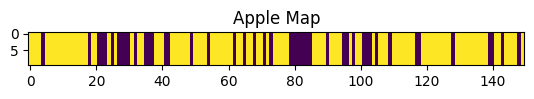

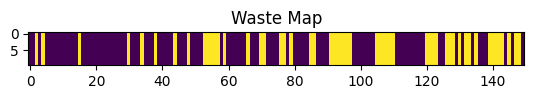

/Users/gabeguralnick/git/social_reinforcement_learning/environments/one_d_cleanup_env.py:430: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  apple_agent_map[np.where(apple_agent_map == id)] = 1


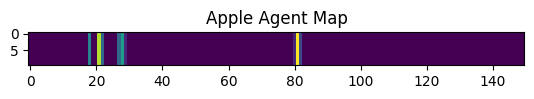

/Users/gabeguralnick/git/social_reinforcement_learning/environments/one_d_cleanup_env.py:440: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  waste_agent_map[np.where(waste_agent_map == id)] = 1


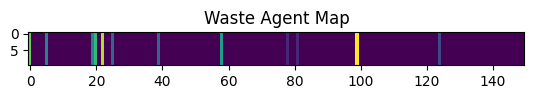

In [6]:
env.render()

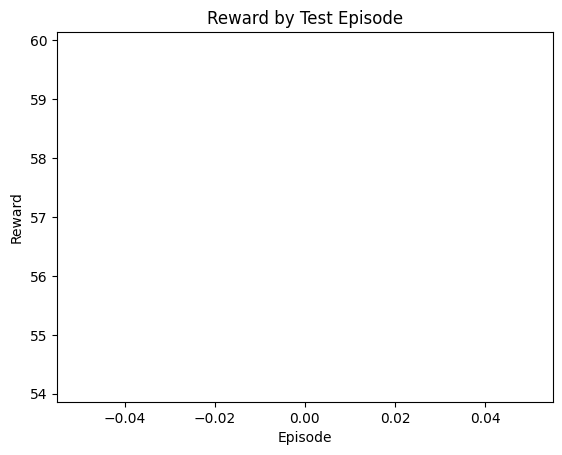

Average reward: 57.0


In [7]:
plt.figure()
plt.title("Reward by Test Episode")
plt.xlabel("Episode")
plt.ylabel("Reward")
plt.plot([stat['total_reward'] for stat in test_stats])
plt.show()
print(f"Average reward: {np.mean([stat['total_reward'] for stat in test_stats])}")

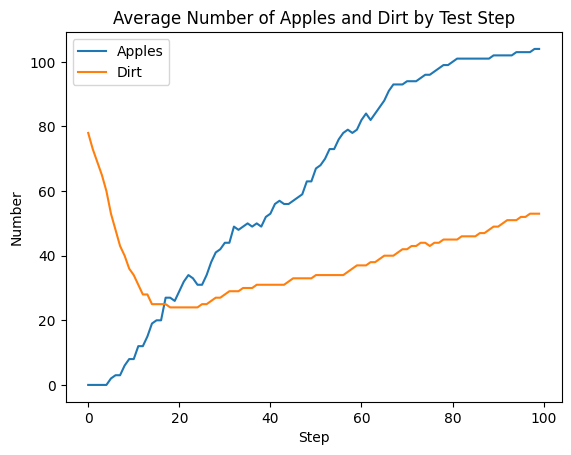

In [8]:
plt.figure()
plt.title("Average Number of Apples and Dirt by Test Step")
plt.xlabel("Step")
plt.ylabel("Number")
avg_num_apples = []
avg_num_dirt = []
for i in range(steps_per_episode):
    avg_num_apples.append(np.mean([stat['num_apples'][i] for stat in test_stats]))
    avg_num_dirt.append(np.mean([stat['num_dirt'][i] for stat in test_stats]))
plt.plot(avg_num_apples, label="Apples")
plt.plot(avg_num_dirt, label="Dirt")
plt.legend()
plt.show()

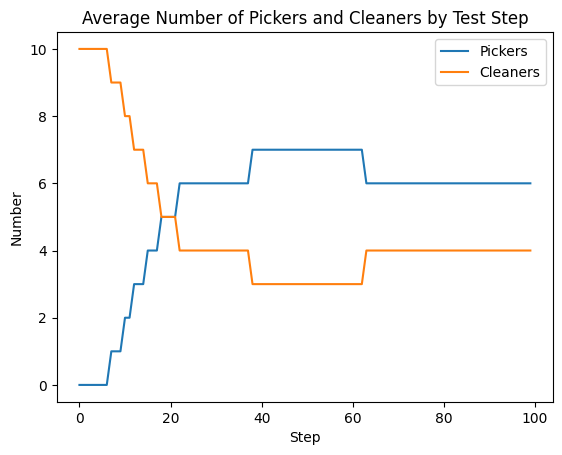

In [9]:
plt.figure()
plt.title("Average Number of Pickers and Cleaners by Test Step")
plt.xlabel("Step")
plt.ylabel("Number")
avg_num_pickers = []
avg_num_cleaners = []
for i in range(steps_per_episode):
    avg_num_pickers.append(np.mean([stat['pickers'][i] for stat in test_stats]))
    avg_num_cleaners.append(np.mean([stat['cleaners'][i] for stat in test_stats]))
plt.plot(avg_num_pickers, label="Pickers")
plt.plot(avg_num_cleaners, label="Cleaners")
plt.legend()
plt.show()

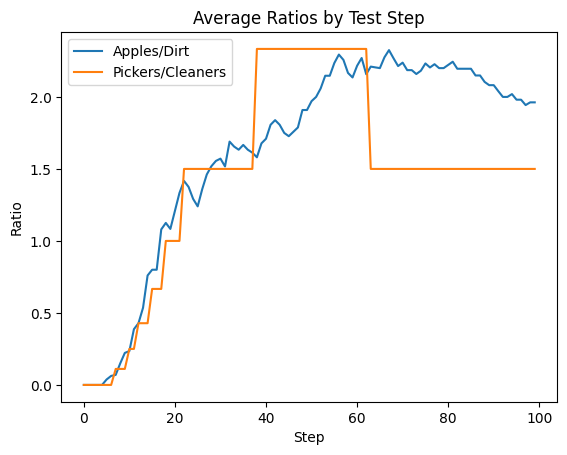

In [10]:
plt.figure()
plt.title("Average Ratios by Test Step")
plt.xlabel("Step")
plt.ylabel("Ratio")
avg_apple_dirt_ratios = []
avg_picker_cleaner_ratios = []
for i in range(steps_per_episode):
    avg_apple_dirt_ratios.append(np.mean([stat['num_apples'][i] / (stat['num_dirt'][i] + 1e-8) for stat in test_stats]))
    avg_picker_cleaner_ratios.append(np.mean([stat['pickers'][i] / (stat['cleaners'][i] + 1e-8) for stat in test_stats]))

plt.plot(avg_apple_dirt_ratios, label="Apples/Dirt")
plt.plot(avg_picker_cleaner_ratios, label="Pickers/Cleaners")
plt.legend()
plt.show()

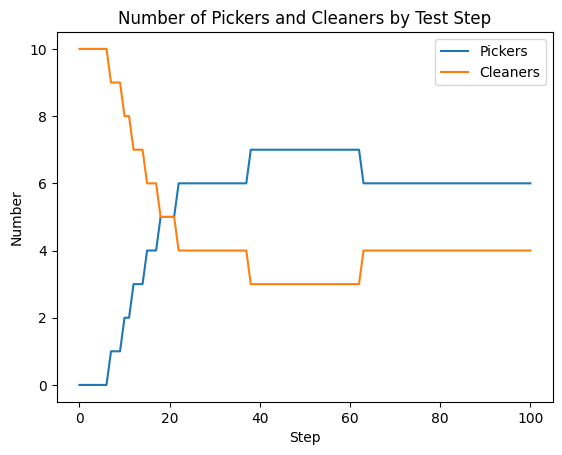

In [11]:
plt.figure()
plt.title("Number of Pickers and Cleaners by Test Step")
plt.xlabel("Step")
plt.ylabel("Number")
episode = test_stats[0]
plt.plot(episode['pickers'], label="Pickers")
plt.plot(episode['cleaners'], label="Cleaners")
plt.legend()
plt.show()